<a href="https://colab.research.google.com/github/anshupandey/Natural_language_Processing/blob/master/Case_Study_Sentiment_Analysis_Amazon_Mobile_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study: Sentiment Analysis

### Data Prep

In [1]:
# This dataset also requires cleaning text and removing unwanted tokens using regular expressions,
# this part is not covered in this notebook to save time but strongly recommeded to perform.

In [2]:
!wget -q https://www.dropbox.com/s/6akxxtsfko5banv/Amazon_Unlocked_Mobile.csv

In [3]:
import pandas as pd
import numpy as np

# Read in the data
df = pd.read_csv(r"Amazon_Unlocked_Mobile.csv")
print(df.shape)
# Sample the data to speed up computation
df = df.sample(frac=0.2, random_state=10)
print(df.shape)
df.head()

(413840, 6)
(82768, 6)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
394349,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0


In [4]:
# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]

# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
print(df.shape)
df.head(10)


(61531, 7)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0,0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0,1
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0,0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0,1
277158,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0,1
100311,Blackberry Torch 2 9810 Unlocked Phone with 1....,BlackBerry,77.49,5,I am pleased with this Blackberry phone! The p...,0.0,1
251669,Motorola Moto E (1st Generation) - Black - 4 G...,Motorola,89.99,5,"Great product, best value for money smartphone...",0.0,1
279878,OtterBox 77-29864 Defender Series Hybrid Case ...,OtterBox,9.99,5,I've bought 3 no problems. Fast delivery.,0.0,1
406017,Verizon HTC Rezound 4G Android Smarphone - 8MP...,HTC,74.99,4,Great phone for the price...,0.0,1
302567,"RCA M1 Unlocked Cell Phone, Dual Sim, 5Mp Came...",RCA,159.99,5,My mom is not good with new technoloy but this...,4.0,1


In [5]:
# Most ratings are positive
df['Positively Rated'].mean()

0.748061952511742

In [6]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], 
                                                    df['Positively Rated'], 
                                                    random_state=0)

In [7]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 This phone is nice i just got one for my daughter but wen it came the charger didn't work I had to go buy a new one


X_train shape:  (46148,)


In [8]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(46148,) (15383,)
(46148,) (15383,)


# CountVectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [10]:
vect.get_feature_names()[::2000]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 'adverts',
 'blitz',
 'condition',
 'distributers',
 'fiio',
 'hillside',
 'launge',
 'namely',
 'pixles',
 'remembers',
 'slooow',
 'thorn',
 'wasent']

In [11]:
len(vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


27015

In [12]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<46148x27015 sparse matrix of type '<class 'numpy.int64'>'
	with 1220684 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(max_iter=500)
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=500)

In [14]:
# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

In [15]:
model.score(vect.transform(X_test),y_test)

0.9373334200091009

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      3874
           1       0.95      0.97      0.96     11509

    accuracy                           0.94     15383
   macro avg       0.93      0.90      0.91     15383
weighted avg       0.94      0.94      0.94     15383

[[ 3246   628]
 [  336 11173]]


In [17]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['worst' 'junk' 'terrible' 'poor' 'garbage' 'horrible' 'sucked' 'useless'
 'slow' 'waste']

Largest Coefs: 
['excelent' 'excelente' 'excellent' 'love' 'loves' 'perfect' 'amazing'
 'awesome' 'exactly' 'best']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Tfidf

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


7754

In [19]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.91      0.84      0.87      3874
           1       0.95      0.97      0.96     11509

    accuracy                           0.94     15383
   macro avg       0.93      0.90      0.91     15383
weighted avg       0.94      0.94      0.94     15383

[[ 3243   631]
 [  340 11169]]


In [20]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['prohibit' 'exposing' 'accompanying' 'bokeh' 'printer' 'stealing'
 'gibberish' 'pgb' 'centigrade' 'barometer']

Largest tfidf: 
['indestructible' 'recommended' 'flimsy' 'classy' 'tough' 'supper' 'fraud'
 'sin' 'adequate' 'superb']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'worst' 'disappointed' 'slow' 'return' 'doesn' 'poor' 'terrible'
 'horrible' 'waste']

Largest Coefs: 
['great' 'love' 'excellent' 'best' 'perfect' 'amazing' 'good' 'far'
 'awesome' 'perfectly']


In [22]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


# n-grams

In [23]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=8, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


32434

In [24]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      3874
           1       0.96      0.98      0.97     11509

    accuracy                           0.95     15383
   macro avg       0.94      0.93      0.93     15383
weighted avg       0.95      0.95      0.95     15383

[[ 3400   474]
 [  286 11223]]


In [25]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['no good' 'junk' 'worst' 'terrible' 'poor' 'horrible' 'not good' 'broken'
 'not happy' 'not satisfied']

Largest Coefs: 
['excellent' 'excelente' 'excelent' 'perfect' 'not bad' 'no problems'
 'great' 'awesome' 'amazing' 'love']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
# These reviews are now correctly identified
print(model.predict(vect.transform(['not an issue, phone is good',
                                    'an issue, phone is not good'])))

[1 0]


# LSTM

In [27]:
from tensorflow.keras import models,layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [28]:
x= df['Reviews']
y = df['Positively Rated']
print(x.shape)
print(y.shape)

(61531,)
(61531,)


In [29]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 120

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', 
                      lower=True)

tokenizer.fit_on_texts(x.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 32361 unique tokens.


In [30]:
#making every reviview of size 250 tokens
x = tokenizer.texts_to_sequences(x.values)
x = pad_sequences(x, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x.shape)

Shape of data tensor: (61531, 250)


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(55377, 250) (55377,)
(6154, 250) (6154,)


In [32]:
model = models.Sequential()
model.add(layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=x.shape[1]))
model.add(layers.SpatialDropout1D(0.2))
model.add(layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=10, batch_size=1000,validation_data=(X_test,Y_test),
                    verbose=True)

Epoch 1/10
56/56 [==============================] - 59s 985ms/step - loss: 0.4600 - accuracy: 0.7847 - val_loss: 0.2779 - val_accuracy: 0.8853
Epoch 2/10
56/56 [==============================] - 63s 1s/step - loss: 0.1957 - accuracy: 0.9258 - val_loss: 0.1709 - val_accuracy: 0.9396
Epoch 3/10
56/56 [==============================] - 53s 938ms/step - loss: 0.1379 - accuracy: 0.9511 - val_loss: 0.1547 - val_accuracy: 0.9449
Epoch 4/10
56/56 [==============================] - 53s 946ms/step - loss: 0.1150 - accuracy: 0.9605 - val_loss: 0.1494 - val_accuracy: 0.9470
Epoch 5/10
56/56 [==============================] - 54s 958ms/step - loss: 0.0999 - accuracy: 0.9659 - val_loss: 0.1480 - val_accuracy: 0.9501
Epoch 6/10
56/56 [==============================] - 56s 993ms/step - loss: 0.0916 - accuracy: 0.9700 - val_loss: 0.1580 - val_accuracy: 0.9472
Epoch 7/10
56/56 [==============================] - 62s 1s/step - loss: 0.0818 - accuracy: 0.9735 - val_loss: 0.1715 - val_accuracy: 0.9465
Epoch

In [33]:
loss,accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(loss,accr))

193/193 [==============================] - 12s 63ms/step - loss: 0.1737 - accuracy: 0.9475
Test set
  Loss: 0.174
  Accuracy: 0.948


In [36]:
X_test.shape

(6154, 250)

In [38]:
model.predict(X_test).shape

(6154, 1)

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 120)          2400000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 120)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               88400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 2,488,501
Trainable params: 2,488,501
Non-trainable params: 0
_________________________________________________________________


Weight calculation in LSTM

`Total weights = 4 x [(size of input + 1)*(size of output) + (size of output^2)]`

total weights = 4*[(120+1)*100 + (100*100)]

array([[0.00177595],
       [0.9999622 ],
       [0.49591604],
       ...,
       [0.99952555],
       [0.9989831 ],
       [0.9998079 ]], dtype=float32)

In [43]:
predictions = model.predict(X_test)
predictions = np.where(predictions>=0.5,1,0)
print(classification_report(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1608
           1       0.95      0.98      0.96      4546

    accuracy                           0.95      6154
   macro avg       0.94      0.92      0.93      6154
weighted avg       0.95      0.95      0.95      6154

[[1396  212]
 [ 111 4435]]


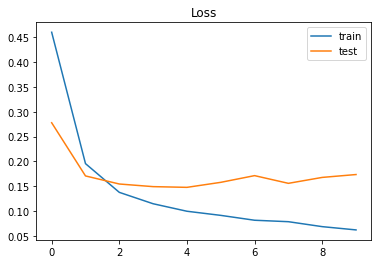

In [44]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

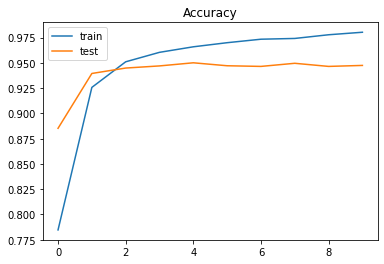

In [45]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()